In [1]:
%matplotlib widget
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from IPython.display import display

In [2]:
%load_ext autoreload
%autoreload 2

from help_func import *
from help_fischer import *
from help_ML import *

In [3]:
# Load the data
base_path = Path.cwd().parent  / "data"/ "exp2_box_ISI300" 
df_eeg= pd.read_csv(base_path /"session_20250710_1721_Ege"/ 'eeg_data.csv')
df_gui = pd.read_csv(base_path /"session_20250710_1721_Ege"/ 'gui_data.csv')

# Interpolate plateaus in ux timestamp
df_eeg = interpolate_plateaus_in_ux(df_eeg)

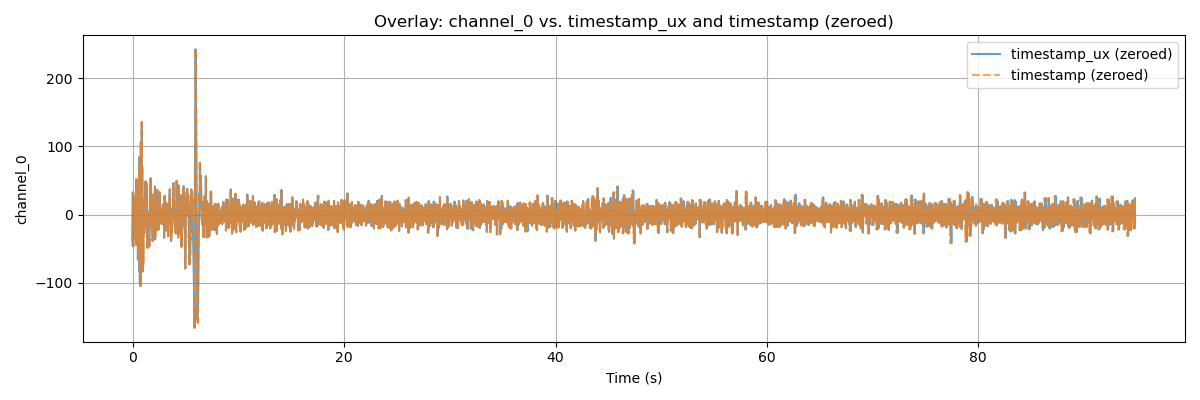

In [6]:
t_ux = df_eeg['timestamp_ux']
t_lsl = df_eeg['timestamp_0']

# Zero the timestamps
#df_eeg['timestamp_ux_0'] = df_eeg['timestamp_ux'] - df_eeg['timestamp_ux'].iloc[0]
#df_eeg['timestamp_0'] = df_eeg['timestamp'] - df_eeg['timestamp'].iloc[0]
t_ux = t_ux - t_ux.iloc[0]
t_lsl = t_lsl - t_lsl.iloc[0] 

# scale lsl by total duration
t_total_ux = t_ux.iloc[-1]
t_total_lsl = t_lsl.iloc[-1]
t_lsl = t_lsl * (t_total_ux / t_total_lsl)


# Plot overlaid signals
plt.figure(figsize=(12, 4))

plt.plot(t_ux, df_eeg['channel_0'], label='timestamp_ux (zeroed)', alpha=0.7)
plt.plot(t_lsl, df_eeg['channel_0'], label='timestamp (zeroed)', linestyle='--', alpha=0.7)

plt.xlabel('Time (s)')
plt.ylabel('channel_0')
plt.title('Overlay: channel_0 vs. timestamp_ux and timestamp (zeroed)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
